# Interaction of California Flights Features 
## by Faisal AlDhuwayhi

## Investigation Overview

In this investigation, we are going to figure out the interactions of the flight features, and try to have a better understanding of it. And our main focus features of the investigation will be:
- Quarter of the year
- Month of flight
- Day of the month
- Day of the week
- Departure delay
- Arrival delay
- The destination city and state of the flight


## Dataset Overview

The data is comprised of information about flights of California state, of the year of 2019. Flights that are going into California or going outside of it. Including variables like destinations, arrival and departure delays, day of the week, and more other features.

In [79]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [80]:
# load in the dataset into a pandas dataframe
flights_master = pd.read_csv('slide_deck.csv')
flights_master.head()

,quarter,month,day_of_month,day_of_week,origin_city_name,origin_state_name,dest_city_name,dest_state_name,crs_dep_time,crs_dep_time_new,...,crs_arr_time,crs_arr_time_new,arr_time,arr_time_new,arr_delay,cancelled,cancellation_code,crs_elapsed_time,actual_elapsed_time,distance
0,Second,April,1,Monday,San Diego,CA,Las Vegas,NV,650,06:50:00,...,815,08:15:00,748,07:48:00,-27,0,NaN,85,70,258.0
1,Second,April,2,Tuesday,San Diego,CA,Las Vegas,NV,650,06:50:00,...,815,08:15:00,800,08:00:00,-15,0,NaN,85,79,258.0
2,Second,April,3,Wednesday,San Diego,CA,Las Vegas,NV,650,06:50:00,...,815,08:15:00,811,08:11:00,-4,0,NaN,85,86,258.0
3,Second,April,4,Thursday,San Diego,CA,Las Vegas,NV,650,06:50:00,...,815,08:15:00,756,07:56:00,-19,0,NaN,85,72,258.0
4,Second,April,5,Friday,San Diego,CA,Las Vegas,NV,650,06:50:00,...,815,08:15:00,814,08:14:00,-1,0,NaN,85,83,258.0


In [81]:
# Convert some variables to categorical data type to make the visualization easier

flights_master['cancellation_code'] = flights_master['cancellation_code'].astype('category')

categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dtype = pd.api.types.CategoricalDtype(categories=categories, ordered=True)
flights_master['day_of_week'] = flights_master['day_of_week'].astype(dtype)

categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
              'November', 'December']
dtype = pd.api.types.CategoricalDtype(categories=categories, ordered=True)
flights_master['month'] = flights_master['month'].astype(dtype)

categories = ['First', 'Second', 'Third', 'Fourth']
dtype = pd.api.types.CategoricalDtype(categories=categories, ordered=True)
flights_master['quarter'] = flights_master['quarter'].astype(dtype)

## Distribution of Day of Month

The last three days of the month have less traffic of flights throughout the year. While the other days show quite consistent.

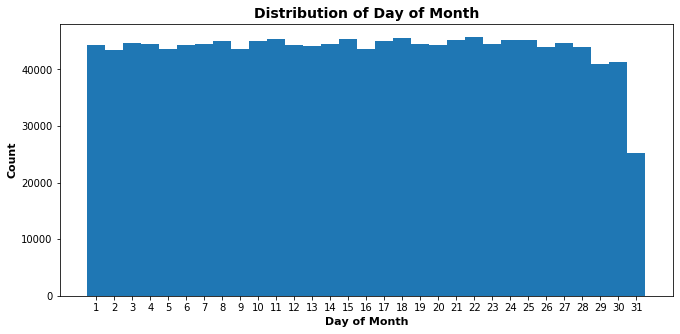

In [82]:
# Histogram plot
plt.figure(figsize=[11,5])
bin_edges = np.arange(0.5, 31.5+1, 1)
plt.hist(data = flights_master, x = 'day_of_month', bins = bin_edges)
plt.xticks(np.arange(1, 31+1, 1))

plt.title('Distribution of Day of Month', fontsize = 14, weight = 'bold')
plt.xlabel('Day of Month', fontsize = 11, weight = 'bold')
plt.ylabel('Count', fontsize = 11, weight = 'bold');

## Number of Flights Over Days of the Week

The weekend days have the least number of flights over the workdays. Which is a bit unexpected. Since we expect to have more flights on weekend days because they're relaxing days. But seems that there are so many work flights on the workdays of the week. And people love to spend the weekend days in their living city.

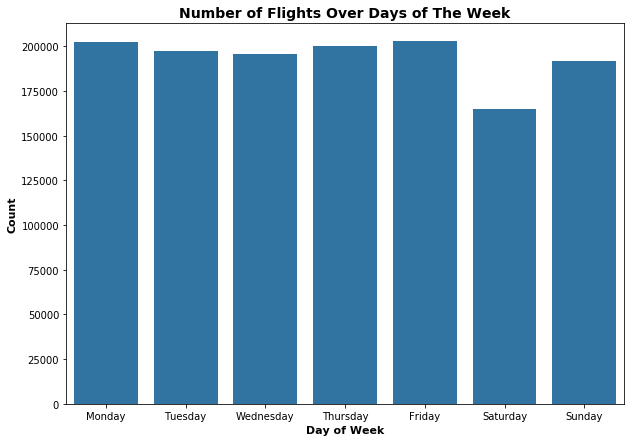

In [83]:
# Bar plot
plt.figure(figsize=[10,7])
base_color = sb.color_palette()[0]
sb.countplot(data = flights_master, x = 'day_of_week', color = base_color)

plt.title('Number of Flights Over Days of The Week', fontsize=14, weight = 'bold')
plt.xlabel('Day of Week', fontsize=11, weight = 'bold')
plt.ylabel('Count', fontsize=11, weight = 'bold');

## Percentage of Flights For The Quarters of The Year

The second and the third quarters of the year have the highest ratio of flights. With slight differences from other quarters.

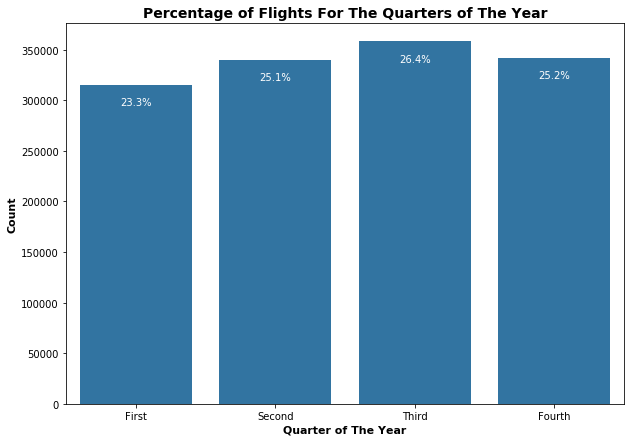

In [84]:
# Bar plot
plt.figure(figsize=[10,7])
base_color = sb.color_palette()[0]
sb.countplot(data = flights_master, x = 'quarter', color = base_color)
plt.title('Percentage of Flights For The Quarters of The Year', fontsize=14, weight = 'bold')
plt.xlabel('Quarter of The Year', fontsize=11, weight = 'bold')
plt.ylabel('Count', fontsize=11, weight = 'bold');


# add annotations
n_points = flights_master.shape[0]
quarter_counts = flights_master['quarter'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = quarter_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-20000, pct_string, ha = 'center', color = 'w')

## Destination Cities of California Flights VS. Days of the Week

The highest number of flights coming to California over the whole week from outside of it, is for the Los Angles city. Coming in second place San Francisco city. And San Diago with the third. And it appears that Santa Maria city and Mammoth lakes have the least number flights coming to it over the whole week.

Flights of California Destination, but with origins from outside of California. 

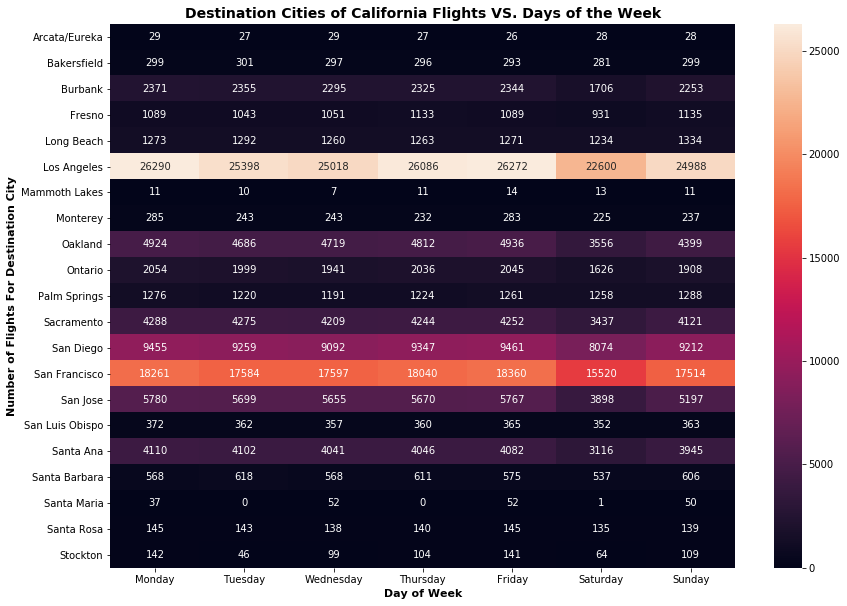

In [89]:
# Heat map
plt.figure(figsize=[14,10])
# taking the California destination of the flights 
toca_flights_master = flights_master[(flights_master.dest_state_name == 'CA') & 
                                  (flights_master.origin_state_name != 'CA')]
ct_counts = toca_flights_master.groupby(['day_of_week', 'dest_city_name']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'dest_city_name', columns = 'day_of_week', values = 'count')

sb.heatmap(ct_counts, annot = True, fmt = 'd')

plt.title('Destination Cities of California Flights VS. Days of the Week', fontsize=14, weight = 'bold')
plt.xlabel('Day of Week', fontsize=11, weight = 'bold')
plt.ylabel('Number of Flights For Destination City', fontsize=11, weight = 'bold');

## Quarters of The Year By The Day of Week

For the first and second quarters, Friday is the most day that people having flights on. But in the third quarter, looks that Monday is the most traffic day with a noticeable difference. And the same thing for Tuesday in the last quarter of the year. Moreover, We noticed that Saturday is the least day of the week in all the quarters of the year for flights number, as we can confirm that in the second plot. 

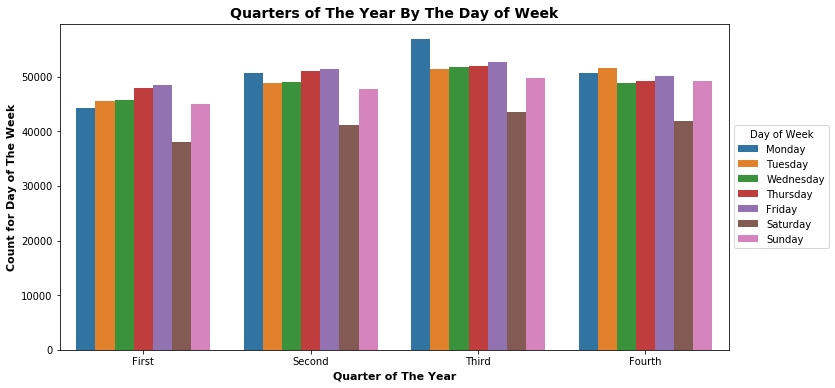

In [86]:
# Clustered Bar Chart
plt.figure(figsize=[12,6])
ax = sb.countplot(data = flights_master, x = 'quarter', hue = 'day_of_week')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Day of Week')

plt.title('Quarters of The Year By The Day of Week', fontsize=14, weight = 'bold')
plt.xlabel('Quarter of The Year', fontsize=11, weight = 'bold')
plt.ylabel('Count for Day of The Week', fontsize=11, weight = 'bold');

## Departure Delay with Months and Days of Week

We infer that February and December have the worst average departure time delay in general. With also showing that Fridays of February and Sundays of December have the highest average departure time delays compare to the whole days of all months. Also, seems to be that October has the best average departure time delay generally.

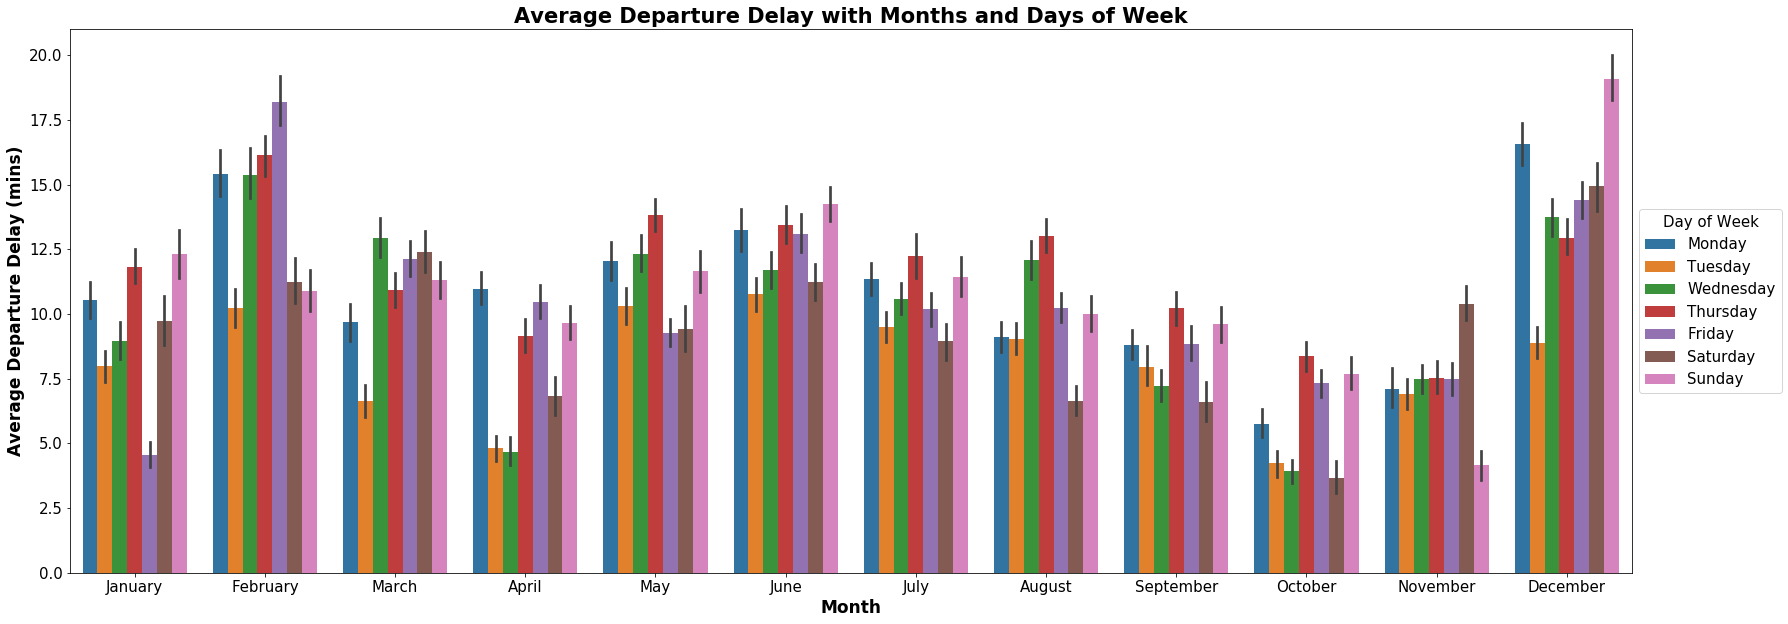

In [96]:
# Adapted clustered bar chart
plt.figure(figsize=[24,10])
ax = sb.barplot(data = flights_master, x = 'month', y = 'dep_delay', hue = 'day_of_week')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Day of Week', fontsize=15, title_fontsize=15)

plt.title('Average Departure Delay with Months and Days of Week', fontsize=21, weight = 'bold')
plt.xlabel('Month', fontsize=17, weight = 'bold')
plt.ylabel('Average Departure Delay (mins)', fontsize=17, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

## Local Flights by The Quarters and Arrival Delay

For the first quarter, Mammoth lakes city appears to be the highest average arrival time delay for destination city of local flights. and the same thing applied to Bakersfield for the second and third quarters. And it looks that San Luis Obispo city has the highest average arrival time delay for the fourth quarter.


Local Flights, only inside of California as an origin and destination. 

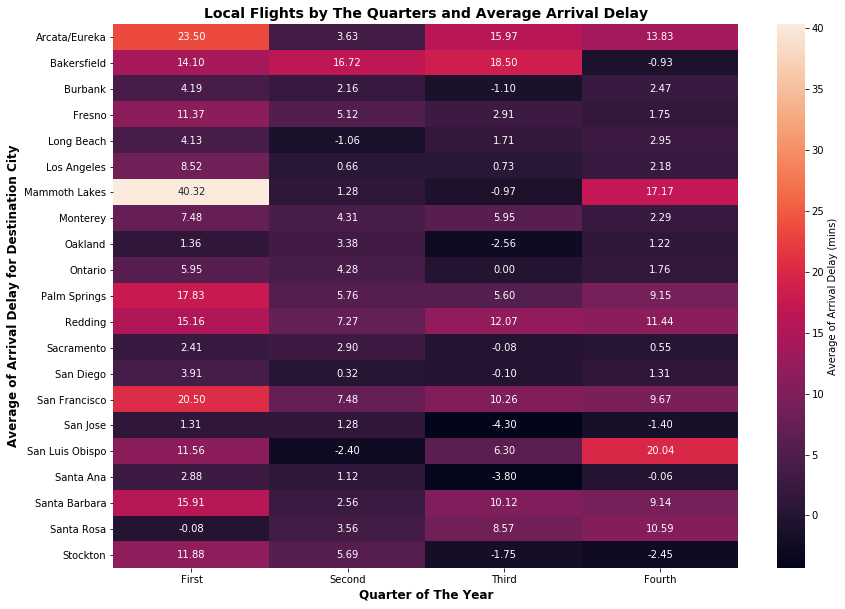

In [88]:
# Adapted heat map
plt.figure(figsize=[14,10])
# taking only the local flights
local_flights_master = flights_master[(flights_master.origin_state_name == 'CA') &
                                   (flights_master.dest_state_name == 'CA')]

cat_means = local_flights_master.groupby(['quarter', 'dest_city_name']).mean()['arr_delay']
cat_means = cat_means.reset_index(name = 'arr_delay_avg')
cat_means = cat_means.pivot(index = 'dest_city_name', columns = 'quarter',
                            values = 'arr_delay_avg')
sb.heatmap(cat_means, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'Average of Arrival Delay (mins)'})

plt.title('Local Flights by The Quarters and Average Arrival Delay', fontsize=14, weight = 'bold')
plt.xlabel('Quarter of The Year', fontsize=12, weight = 'bold')
plt.ylabel('Average of Arrival Delay for Destination City', fontsize=12, weight = 'bold');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!